<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_1_gan_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 7: Generative Adversarial Networks**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 7 Material

* **Part 7.1: Introduction to GANs for Image and Data Generation** [[Video]](https://www.youtube.com/watch?v=hZw-AjbdN5k&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_1_gan_intro.ipynb)
* Part 7.2: Train StyleGAN3 with your Own Images [[Video]](https://www.youtube.com/watch?v=R546LYsQk5M&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_2_train_gan.ipynb)
* Part 7.3: Exploring the StyleGAN Latent Vector [[Video]](https://www.youtube.com/watch?v=goQzp8QSb2s&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_3_latent_vector.ipynb)
* Part 7.4: GANs to Enhance Old Photographs Deoldify [[Video]](https://www.youtube.com/watch?v=0OTd5GlHRx4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_4_deoldify.ipynb)
* Part 7.5: GANs for Tabular Synthetic Data Generation [[Video]](https://www.youtube.com/watch?v=yujdA46HKwA&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_5_tabular_synthetic.ipynb)


# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


# Part 7.1: Introduction to GANS for Image and Data Generation

A generative adversarial network (GAN) is a class of machine learning systems invented by Ian Goodfellow in 2014. [[Cite:goodfellow2014generative]](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) Two neural networks compete with each other in a game. The GAN training algorithm starts with a training set and learns to generate new data with the same distributions as the training set. For example, a GAN trained on photographs can generate new photographs that look at least superficially authentic to human observers, having many realistic characteristics. 

This chapter makes use of the PyTorch framework rather than Keras/TensorFlow. While there are versions of [StyleGAN2-ADA that work with TensorFlow 1.0](https://github.com/jeffheaton/t81_558_deep_learning/blob/5e2528a08c302c82919001a3c3c8364c29c1b999/t81_558_class_07_3_style_gan.ipynb), NVIDIA has switched to PyTorch for StyleGAN. Running this notebook in this notebook in Google CoLab is the most straightforward means of completing this chapter. Because of this, I designed this notebook to run in Google CoLab. It will take some modifications if you wish to run it locally.

This original StyleGAN paper used neural networks to automatically generate images for several previously seen datasets: MINST and CIFAR. However, it also included the Toronto Face Dataset (a private dataset used by some researchers). You can see some of these images in Figure 7.GANS.

**Figure 7.GANS: GAN Generated Images**
![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan-2.png "GAN Generated Images")

Only sub-figure D made use of convolutional neural networks. Figures A-C make use of fully connected neural networks. As we will see in this module, the researchers significantly increased the role of convolutional neural networks for GANs.

We call a GAN a generative model because it generates new data. You can see the overall process in Figure 7.GAN-FLOW.

**Figure 7.GAN-FLOW: GAN Structure**
![GAN Structure](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan-1.png "GAN Structure")

## Face Generation with StyleGAN and Python

GANs have appeared frequently in the media, showcasing their ability to generate highly photorealistic faces. One significant step forward for realistic face generation was the NVIDIA StyleGAN series. NVIDIA introduced the origional StyleGAN in 2018. [[Cite:karras2019style]](https://arxiv.org/abs/1812.04948) StyleGAN was followed by StyleGAN2 in 2019, which improved the quality of StyleGAN by removing certian artifacts. [[Cite:karras2019analyzing]](https://arxiv.org/abs/1912.04958) Most recently, in 2020, NVIDIA released StyleGAN2 adaptive discriminator augmentation (ADA), which will be the focus of this module. [[Cite:karras2020training]](https://arxiv.org/abs/2006.06676)  We will see both how to train StyleGAN2 ADA on any arbitray set of images; as well as use pretrained weights provided by NVIDIA. The NVIDIA weights allow us to generate high resolution photorealistic looking faces, such seen in Figure 7.STY-GAN.

**Figure 7.STY-GAN: StyleGAN2 Generated Faces**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2_images.jpg "StyleGAN2 Generated Faces")

The above images were generated with StyleGAN2, using Google CoLab. Following the instructions in this section, you will be able to create faces like this of your own. StyleGAN2 images are usually 1,024 x 1,024 in resolution.  An example of a full-resolution StyleGAN image can be [found here](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-hires.jpg). 

The primary advancement introduced by the adaptive discriminator augmentation is that the algorithm augments the training images in real-time. Image augmentation is a common technique in many convolution neural network applications. Augmentation has the effect of increasing the size of the training set. Where StyleGAN2 previously required over 30K images for an effective to develop an effective neural network; now much fewer are needed. I used 2K images to train the fish generating GAN for this section. Figure 7.STY-GAN-ADA demonstrates the ADA process.

**Figure 7.STY-GAN-ADA: StyleGAN2 ADA Training**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-ada-teaser-1024x252.jpg "StyleGAN2 Generated Faces")

The figure shows the increasing probability of augmentation as $p$ increases. For small image sets, the discriminator will generally memorize the image set unless the training algorithm makes use of augmentation. Once this memorization occurs, the discriminator is no longer providing useful information to the training of the generator.

While the above images look much more realistic than images generated earlier in this course, they are not perfect. Look at Figure 7.STYLEGAN2. There are usually several tell-tail signs that you are looking at a computer-generated image. One of the most obvious is usually the surreal, dream-like backgrounds. The background does not look obviously fake at first glance; however, upon closer inspection, you usually can't quite discern what a GAN-generated background is. Also, look at the image character's left eye. It is slightly unrealistic looking, especially near the eyelashes.

Look at the following GAN face. Can you spot any imperfections?

**Figure 7.STYLEGAN2: StyleGAN2 Face**
![StyleGAN2 Face](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_bad.jpg "StyleGAN2 Face")

* Image A demonstrates the abstract backgrounds usually associated with a GAN-generated image.
* Image B exhibits issues that earrings often present for GANs. GANs sometimes have problems with symmetry, particularly earrings.
* Image C contains an abstract background and a highly distorted secondary image.
* Image D also contains a highly distorted secondary image that might be a hand.

Several websites allow you to generate GANs of your own without any software.

* [This Person Does not Exist](https://www.thispersondoesnotexist.com/)
* [Which Face is Real](http://www.whichfaceisreal.com/)

The first site generates high-resolution images of human faces. The second site presents a quiz to see if you can detect the difference between a real and fake human face image.

In this chapter, you will learn to create your own StyleGAN pictures using Python.

## Generating High Rez GAN Faces with Google CoLab

This notebook demonstrates how to run [NVidia StyleGAN2 ADA](https://github.com/NVlabs/stylegan2-ada) inside a Google CoLab notebook.  I suggest you use this to generate GAN faces from a pretrained model.  If you try to train your own, you will run into compute limitations of Google CoLab. Make sure to run this code on a GPU instance.  GPU is assumed.

First, we clone StyleGAN3 from GitHub.

In [2]:
# HIDE OUTPUT
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

Cloning into 'stylegan3'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 193 (delta 55), reused 52 (delta 52), pack-reused 102
Receiving objects: 100% (193/193), 4.17 MiB | 11.50 MiB/s, done.
Resolving deltas: 100% (89/89), done.
     |████████████████████████████████| 108 kB 4.3 MB/s 



Verify that StyleGAN has been cloned.

In [3]:
!ls /content/stylegan3

avg_spectra.py	 Dockerfile	  gen_video.py	metrics      train.py
calc_metrics.py  docs		  gui_utils	README.md    visualizer.py
dataset_tool.py  environment.yml  legacy.py	torch_utils  viz
dnnlib		 gen_images.py	  LICENSE.txt	training


## Run StyleGan From Command Line

Add the StyleGAN folder to Python so that you can import it. I based this code below on code from NVidia for the original StyleGAN paper. When you use StyleGAN you will generally create a GAN from a seed number. This seed is an integer, such as 6600, that will generate a unique image. The seed generates a latent vector containing 512 floating-point values. The GAN code uses the seed to generate these 512 values. The seed value is easier to represent in code than a 512 value vector; however, while a small change to the latent vector results in a slight change to the image, even a small change to the integer seed value will produce a radically different image.

In [4]:
# HIDE OUTPUT
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
      "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=6600-6625 

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 6600 (0/26) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Generating image for seed 6605 (5/26) ...
Generating image for seed 6606 (6/26) ...
Generating image for seed 6607 (7/26) ...
Generating image for seed 6608 (8/26) ...
Generating image for seed 6609 (9/26) ...
Generating image for seed 6610 (10/26) ...
Generating image for seed 6611 (11/26) ...
Generating image for seed 6612 (12/26) ...
Generating image for seed 6613 (13/26) ...
Generating image for seed 6614 (14/26) ...
Generating image for seed 6615 (15/26) ...
Generating image for seed 6616 (16/26) ...
Generating image for seed 661

We can now display the images created.

In [5]:
!ls /content/results

seed6600.png  seed6606.png  seed6612.png  seed6618.png	seed6624.png
seed6601.png  seed6607.png  seed6613.png  seed6619.png	seed6625.png
seed6602.png  seed6608.png  seed6614.png  seed6620.png
seed6603.png  seed6609.png  seed6615.png  seed6621.png
seed6604.png  seed6610.png  seed6616.png  seed6622.png
seed6605.png  seed6611.png  seed6617.png  seed6623.png


Next, copy the images to a folder of your choice on GDrive.

In [6]:
!cp /content/results/* \
    /content/drive/My\ Drive/projects/stylegan3

## Run StyleGAN From Python Code

Add the StyleGAN folder to Python so that you can import it.  

In [7]:
import sys
sys.path.insert(0, "/content/stylegan3")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, 
         nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    # [minibatch, height, width, channel]
    images = G.run(z, label, **G_kwargs) 
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail("Must specify class label with --class when using "\
            "a conditional network")
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ("warn: --class=lbl ignored when running on "\
            "an unconditional network")
  return label

def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const', 
                   class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(\
      torch.uint8)
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

In [8]:
#URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/"\
#  "download/1.0.0/fish-gan-2020-12-09.pkl"
#URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/"\
#  "download/v1/christmas-gan-2020-12-03.pkl"
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...


We can now generate images from integer seed codes in Python.

Seed 1000
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


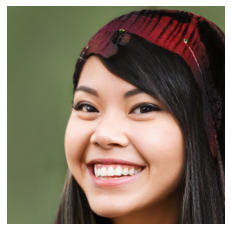

Seed 1001


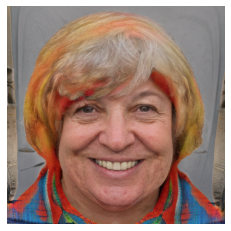

Seed 1002


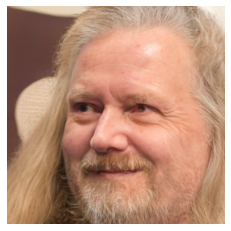

In [9]:
# Choose your own starting and ending seed.
SEED_FROM = 1000
SEED_TO = 1003

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

## Examining the Latent Vector

Figure 7.LVEC shows the effects of transforming the latent vector between two images. We accomplish this transformation by slowly moving one 512-value latent vector to another 512 vector. A high-dimension point between two latent vectors will appear similar to both of the two endpoint latent vectors. Images that have similar latent vectors will appear similar to each other.

**Figure 7.LVEC: Transforming the Latent Vector**
![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_progression.jpg "GAN")

In [10]:
def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    result.append( rnd.randn(1, vector_size) ) 
  return result

#URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/"\
#  "download/1.0.0/fish-gan-2020-12-09.pkl"
#URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/"\
#  "download/v1/christmas-gan-2020-12-03.pkl"
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

vector_size = G.z_dim
# range(8192,8300)
seeds = expand_seed( [8192+1,8192+9], vector_size)
#generate_images(Gs, seeds,truncation_psi=0.5)
print(seeds[0].shape)

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
(1, 512)


The following code will move between the provided seeds.  The constant STEPS specify how many frames there should be between each seed.

In [11]:
# HIDE OUTPUT
# Choose your seeds to morph through and the number of steps to 
# take to get to each.

SEEDS = [6624,6618,6616] # Better for faces
#SEEDS = [1000,1003,1001] # Better for fish
STEPS = 100

# Remove any prior results
!rm /content/results/* 

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(G, SEEDS[i])
  v2 = seed2vec(G, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
    current = current + step
    img = generate_image(device, G, current)
    img.save(f'./results/frame-{idx}.png')
    idx+=1
 
# Link the images into a video.
!ffmpeg -r 30 -i /content/results/frame-%d.png -vcodec mpeg4 -y movie.mp4

Seed 6624:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 6618:   0%|          | 0/100 [00:00<?, ?it/s]

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

You can now download the generated video.

In [12]:
from google.colab import files
files.download('movie.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Module 7 Assignment

You can find the first assignment here: [assignment 7](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class7.ipynb)